## Kmeans 사용 군집화 하기

### Feature 설명
- 성별 Sex : 1 남성 2 여성
- 소득 Income : 1-7
- 나이 Age : 1 -7
- reason 선정이유 : 1: 지명도 2:볼거리 4:거리 5:여행가능시간(->3)
-   type 여행유형 : relax: 1, shop:2, exp: 3, watch: 4
-   교통 Traffic : 1 자동차 2 대중교통 3 기타
-   숙박 Sleep : 1 캠프   2 업체   3 무박기타
-   지출비용 Cost : 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 → qcut
-   동반자유형 With : 1 가족  2 친구연인  3단체기타

In [7]:
import pickle
with open('final_feature.pickle', 'rb') as f:
    df = pickle.load(f)
df.head()

,Sex,Age,Income,Reason,Cost,Type,Traffic,With,Sleep
0,1,3,3,1.0,9,1.0,1.0,1.0,2
1,1,6,4,2.0,10,1.0,2.0,1.0,2
2,2,2,3,2.0,6,2.0,1.0,2.0,2
3,1,4,3,2.0,2,1.0,1.0,2.0,2
4,2,3,4,4.0,6,1.0,1.0,2.0,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6890 entries, 0 to 6889
Data columns (total 9 columns):
Sex        6890 non-null int64
Age        6890 non-null int64
Income     6890 non-null int64
Reason     6890 non-null float64
Cost       6890 non-null int64
Type       6890 non-null float64
Traffic    6890 non-null float64
With       6890 non-null float64
Sleep      6890 non-null int64
dtypes: float64(4), int64(5)
memory usage: 484.5 KB


### K-means

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import cluster
from sklearn import metrics
import pandas as pd
%matplotlib inline

In [14]:
df_data = df.copy()
df_data.head()

,Sex,Age,Income,Reason,Cost,Type,Traffic,With,Sleep
0,1,3,3,1.0,9,1.0,1.0,1.0,2
1,1,6,4,2.0,10,1.0,2.0,1.0,2
2,2,2,3,2.0,6,2.0,1.0,2.0,2
3,1,4,3,2.0,2,1.0,1.0,2.0,2
4,2,3,4,4.0,6,1.0,1.0,2.0,3


In [15]:
X = np.array(df_data)

### elbow로 클러스터 갯수 시각화

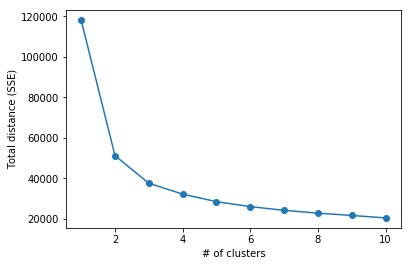

In [16]:
def elbow(X):
    total_distance = []
    for i in range(1, 11):
        model = cluster.KMeans(n_clusters=i, random_state=0)
        model.fit(X)
        
        # inertia : Sum of squared distances of samples to their closest cluster center.
        total_distance.append(model.inertia_) 
        
    plt.plot(range(1, 11), total_distance, marker='o')
    plt.xlabel('# of clusters')
    plt.ylabel('Total distance (SSE)')
    plt.show()

elbow(X)

### Kmeans - K:4

In [46]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=4, random_state=1)
kmeans = Kmean.fit(X)

In [47]:
df_data['Cluster']= kmeans.labels_
df_data.head(10)

,Sex,Age,Income,Reason,Cost,Type,Traffic,With,Sleep,Cluster
0,1,3,3,1.0,9,1.0,1.0,1.0,2,3
1,1,6,4,2.0,10,1.0,2.0,1.0,2,0
2,2,2,3,2.0,6,2.0,1.0,2.0,2,3
3,1,4,3,2.0,2,1.0,1.0,2.0,2,2
4,2,3,4,4.0,6,1.0,1.0,2.0,3,3
5,1,7,2,1.0,1,1.0,1.0,1.0,2,1
6,2,3,3,1.0,2,3.0,1.0,1.0,2,2
7,1,3,3,1.0,8,1.0,1.0,2.0,2,3
8,1,6,2,2.0,1,1.0,2.0,3.0,2,1
9,1,6,2,2.0,2,1.0,1.0,1.0,2,1


In [48]:
#  inertia는 각 데이터로부터 자신이 속한 군집의 중심까지의 거리
print (kmeans.inertia_)

32257.107540044162


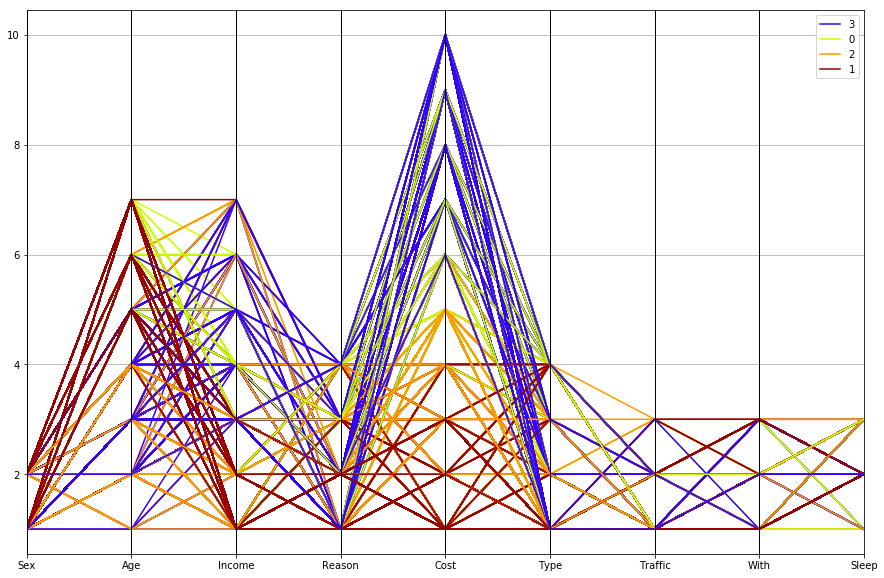

In [49]:
plt.figure(figsize=(15,10))
pd.plotting.parallel_coordinates(df_data, 'Cluster', color=('#3300FF', '#CCFF00', '#FF9900', '#990000') )
plt.show() 

### PCA & 클러스터 시각화

In [50]:
# Explained Variance Ratio : 각 주성분이 분산을 설명하는 비율을 확인할 수 있음
d = df
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X3D = pca.fit_transform(d)
X3D

array([[ 4.79789697, -0.52358351, -0.64210327],
       [ 4.75796428, -3.3257276 ,  1.04675489],
       [ 2.64704697,  1.78201508, -0.58309653],
       ...,
       [-2.0455475 ,  1.11076251,  1.05297026],
       [-4.33858465, -0.72840443, -0.24800812],
       [ 5.3830477 , -0.0453293 ,  1.26090625]])

In [56]:
pca_df = pd.DataFrame(data=X3D, columns = ['PCA1', 'PCA2', 'PCA3'])
pca_df.tail()

,PCA1,PCA2,PCA3
6885,-1.457559,0.371592,-0.143590
6886,-1.650326,1.967075,0.755978
6887,-2.045548,1.110763,1.052970
6888,-4.338585,-0.728404,-0.248008
6889,5.383048,-0.045329,1.260906


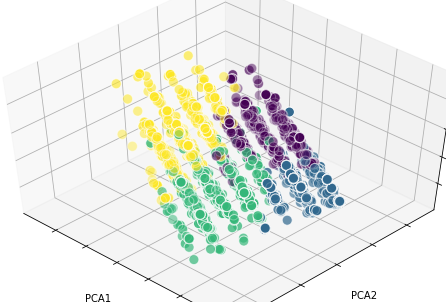

In [63]:
fig = plt.figure()
ax = Axes3D(fig, elev=48, azim=134) # Set the elevation and azimuth of the axes. (축의 고도와 방위각)

ax.scatter(X3D[:, 0], X3D[:, 1], X3D[:, 2], c=kmeans.labels_, edgecolor='w', s=100)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.dist = 8 # 값이 커지면 전체 plot 이 작아짐

plt.show()

### Kmeans - K:3

In [65]:
Kmean3 = KMeans(n_clusters=3, random_state=1)
kmeans3 = Kmean3.fit(X)

In [67]:
df3 = df.copy()
df3['Cluster']= kmeans3.labels_
df3.head()

,Sex,Age,Income,Reason,Cost,Type,Traffic,With,Sleep,Cluster
0,1,3,3,1.0,9,1.0,1.0,1.0,2,1
1,1,6,4,2.0,10,1.0,2.0,1.0,2,1
2,2,2,3,2.0,6,2.0,1.0,2.0,2,2
3,1,4,3,2.0,2,1.0,1.0,2.0,2,2
4,2,3,4,4.0,6,1.0,1.0,2.0,3,1


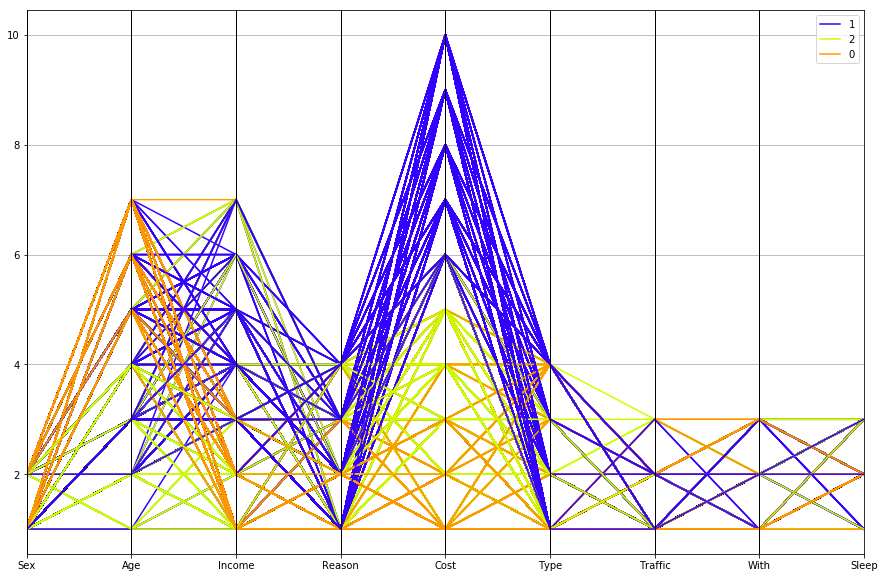

In [68]:
plt.figure(figsize=(15,10))
pd.plotting.parallel_coordinates(df3, 'Cluster', color=('#3300FF', '#CCFF00', '#FF9900') )
plt.show() 

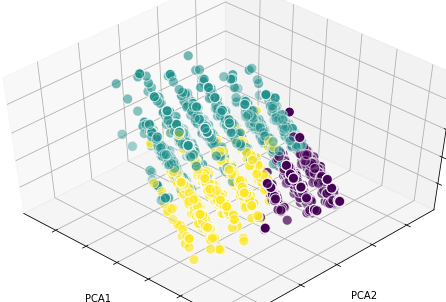

In [69]:
fig = plt.figure()
ax = Axes3D(fig, elev=48, azim=134) # Set the elevation and azimuth of the axes. (축의 고도와 방위각)

ax.scatter(X3D[:, 0], X3D[:, 1], X3D[:, 2], c=kmeans3.labels_, edgecolor='w', s=100)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.dist = 8 # 값이 커지면 전체 plot 이 작아짐

plt.show()

In [70]:
# 피클로 백업

with open("clustered.pickle","wb") as fw:
    pickle.dump(df3, fw)

In [71]:
df4 = pd.pivot_table(df_data, index = 'Cluster')
df4.head()

,Age,Cost,Income,Reason,Sex,Sleep,Traffic,Type,With
Cluster,,,,,,,,,
0,6.149792,7.009709,2.460472,2.147018,1.576976,2.169209,1.231623,1.631068,1.685160
1,6.547678,1.613967,1.484580,1.868132,1.731655,2.021269,1.079759,1.142857,1.357320
2,2.913510,3.348106,2.760543,2.188706,1.345247,2.158685,1.106505,1.501072,1.957112
3,3.065675,8.348897,3.535659,1.891739,1.368907,2.048743,1.100051,1.364802,1.978450
